In [17]:
import pandas as pd
import datetime
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanAbsoluteError,Huber,mse
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2

In [59]:
def display_versions():
    print("Pandas version:", pd.__version__)
    print("Numpy version:", np.__version__)
    print("TensorFlow version:", tf.__version__)
    print("Matplotlib version:", matplotlib.__version__)
    print("Scikit-learn version:", sklearn.__version__)

# Call the function to display the versions
display_versions()


Pandas version: 2.0.3
Numpy version: 1.26.4
TensorFlow version: 2.15.0


NameError: name 'matplotlib' is not defined

In [18]:
newdata=pd.read_excel("NEW DATS.xlsx")

In [19]:
newdata

,YEAR,DOY,HR,WAVE,Unnamed: 4,D,Unnamed: 6,DATE
0,1963,332,0,79.0,1963332,1963-11-28,332,1963-11-28
1,1963,333,0,79.0,1963333,1963-11-29,333,1963-11-29
2,1963,334,0,79.0,1963334,1963-11-30,334,1963-11-30
3,1963,335,0,79.0,1963335,1963-12-01,335,1963-12-01
4,1963,336,0,80.0,1963336,1963-12-02,336,1963-12-02
...,...,...,...,...,...,...,...,...
21939,2023,361,0,144.5,2023361,2023-12-27,361,2023-12-27
21940,2023,362,0,141.8,2023362,2023-12-28,362,2023-12-28
21941,2023,363,0,138.2,2023363,2023-12-29,363,2023-12-29
21942,2023,364,0,135.1,2023364,2023-12-30,364,2023-12-30


In [20]:
newdata.columns

Index(['YEAR', 'DOY', 'HR', 'WAVE', 'Unnamed: 4', 'D', 'Unnamed: 6', 'DATE'], dtype='object')

In [21]:
newdata.drop(columns=['YEAR', 'DOY','HR','Unnamed: 4','D','Unnamed: 6'], inplace=True)

In [22]:
newdata

,WAVE,DATE
0,79.0,1963-11-28
1,79.0,1963-11-29
2,79.0,1963-11-30
3,79.0,1963-12-01
4,80.0,1963-12-02
...,...,...
21939,144.5,2023-12-27
21940,141.8,2023-12-28
21941,138.2,2023-12-29
21942,135.1,2023-12-30


In [23]:
data=newdata[['DATE','WAVE']]

In [24]:
data

,DATE,WAVE
0,1963-11-28,79.0
1,1963-11-29,79.0
2,1963-11-30,79.0
3,1963-12-01,79.0
4,1963-12-02,80.0
...,...,...
21939,2023-12-27,144.5
21940,2023-12-28,141.8
21941,2023-12-29,138.2
21942,2023-12-30,135.1


In [25]:
data['DATE']

0        1963-11-28
1        1963-11-29
2        1963-11-30
3        1963-12-01
4        1963-12-02
            ...    
21939    2023-12-27
21940    2023-12-28
21941    2023-12-29
21942    2023-12-30
21943    2023-12-31
Name: DATE, Length: 21944, dtype: object

In [26]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [27]:
data['DATE'] = data['DATE'].apply(str_to_datetime)
data['DATE']

0       1963-11-28
1       1963-11-29
2       1963-11-30
3       1963-12-01
4       1963-12-02
           ...    
21939   2023-12-27
21940   2023-12-28
21941   2023-12-29
21942   2023-12-30
21943   2023-12-31
Name: DATE, Length: 21944, dtype: datetime64[ns]

In [28]:
data.index=data.pop('DATE')

In [29]:
data

,WAVE
DATE,
1963-11-28,79.0
1963-11-29,79.0
1963-11-30,79.0
1963-12-01,79.0
1963-12-02,80.0
...,...
2023-12-27,144.5
2023-12-28,141.8
2023-12-29,138.2


Text(0, 0.5, 'F10.7 Value')

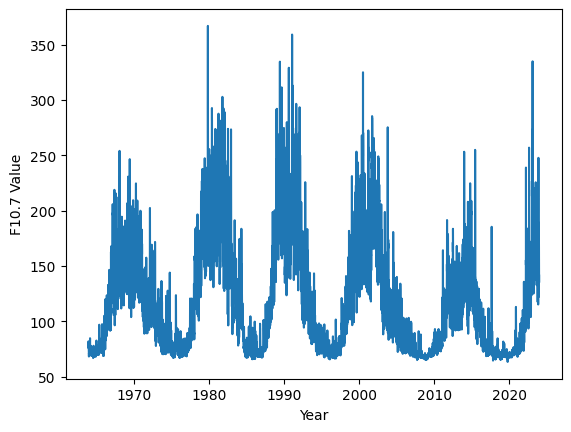

In [30]:
plt.plot(data.index,data['WAVE'])
plt.xlabel('Year')
plt.ylabel('F10.7 Value')

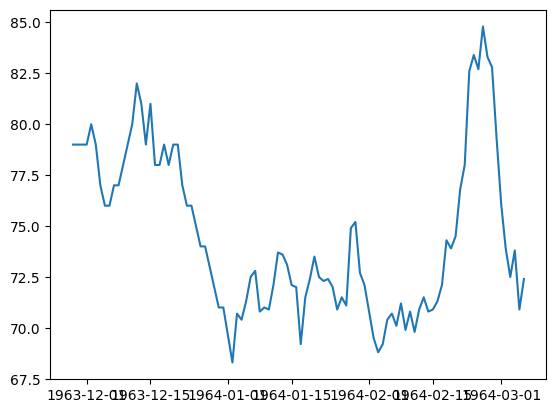

In [31]:
plt.plot(data[:100])

In [32]:
import numpy as np

import pandas as pd
import datetime

import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = pd.to_datetime(first_date_str)  # Convert to datetime
    last_date = pd.to_datetime(last_date_str)    

    target_date = first_date

    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        values = df_subset['WAVE'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True


    
    max_len = max(len(seq) for seq in X)

    # Pad sequences in X to ensure they all have the same length
    X_padded = [np.pad(seq, (0, max_len - len(seq)), mode='constant') for seq in X]

    # Convert lists of arrays to a 2D NumPy array
    X_array = np.array(X_padded)
    print("X shape:", X_array.shape)

    # Convert Y to a NumPy array
    Y_array = np.array(Y)
    print("Y shape:", Y_array.shape)

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    for i in range(max_len):
        ret_df[f'Target-{max_len-i}'] = X_array[:, i]

    ret_df['Target'] = Y_array

    return ret_df



In [33]:
windowed_df = df_to_windowed_df(data, 
                                "1964-05-02", 
                                "2023-12-31", 
                                n=100)
windowed_df

X shape: (21788, 100)
Y shape: (21788,)


C:\Users\roshan muhammed r\AppData\Local\Temp\ipykernel_7040\702517242.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Target-{max_len-i}'] = X_array[:, i]
C:\Users\roshan muhammed r\AppData\Local\Temp\ipykernel_7040\702517242.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df['Target'] = Y_array


,Target Date,Target-100,Target-99,Target-98,Target-97,Target-96,Target-95,Target-94,Target-93,Target-92,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,1964-05-02,72.4,72.0,70.9,71.5,71.1,74.9,75.2,72.7,72.1,...,71.1,72.5,71.4,70.5,70.5,70.9,69.8,70.0,70.0,69.5
1,1964-05-03,72.0,70.9,71.5,71.1,74.9,75.2,72.7,72.1,70.8,...,72.5,71.4,70.5,70.5,70.9,69.8,70.0,70.0,69.5,71.0
2,1964-05-04,70.9,71.5,71.1,74.9,75.2,72.7,72.1,70.8,69.5,...,71.4,70.5,70.5,70.9,69.8,70.0,70.0,69.5,71.0,71.5
3,1964-05-05,71.5,71.1,74.9,75.2,72.7,72.1,70.8,69.5,68.8,...,70.5,70.5,70.9,69.8,70.0,70.0,69.5,71.0,71.5,73.2
4,1964-05-06,71.1,74.9,75.2,72.7,72.1,70.8,69.5,68.8,69.2,...,70.5,70.9,69.8,70.0,70.0,69.5,71.0,71.5,73.2,72.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21783,2023-12-27,156.0,167.6,156.8,169.4,177.0,174.1,174.8,171.1,165.7,...,156.3,173.5,189.1,187.4,180.7,168.6,177.4,161.3,149.1,144.5
21784,2023-12-28,167.6,156.8,169.4,177.0,174.1,174.8,171.1,165.7,156.7,...,173.5,189.1,187.4,180.7,168.6,177.4,161.3,149.1,144.5,141.8
21785,2023-12-29,156.8,169.4,177.0,174.1,174.8,171.1,165.7,156.7,148.4,...,189.1,187.4,180.7,168.6,177.4,161.3,149.1,144.5,141.8,138.2
21786,2023-12-30,169.4,177.0,174.1,174.8,171.1,165.7,156.7,148.4,155.5,...,187.4,180.7,168.6,177.4,161.3,149.1,144.5,141.8,138.2,135.1


In [34]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((21788,), (21788, 100, 1), (21788,))

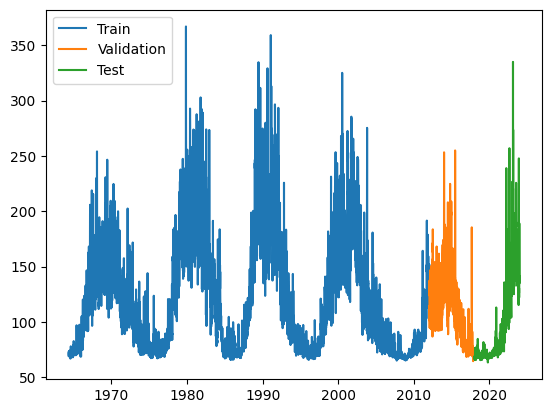

In [35]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [36]:
model=Sequential()
model.add(InputLayer((100,1)))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(128,'relu',kernel_regularizer=L2(0.001)))
model.add(Dense(128,'relu',kernel_regularizer=L2(0.001)))
model.add(Dense(128,'relu',kernel_regularizer=L2(0.001)))
model.add(Dense(1,'linear'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 100, 128)          33792     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 

In [37]:
cp=ModelCheckpoint('model/',save_best_only=True)
model.compile(loss=MeanAbsoluteError(),optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_percentage_error'])


In [38]:
model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=5,callbacks=[cp])

Epoch 1/5


545/545 [==============================] - ETA: 0s - loss: 16.2395 - mean_absolute_percentage_error: 12.5275INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


545/545 [==============================] - 80s 127ms/step - loss: 16.2395 - mean_absolute_percentage_error: 12.5275 - val_loss: 4.7874 - val_mean_absolute_percentage_error: 3.9918
Epoch 2/5
545/545 [==============================] - ETA: 0s - loss: 4.7194 - mean_absolute_percentage_error: 3.4353INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


545/545 [==============================] - 70s 128ms/step - loss: 4.7194 - mean_absolute_percentage_error: 3.4353 - val_loss: 4.0597 - val_mean_absolute_percentage_error: 3.2104
Epoch 3/5
545/545 [==============================] - 46s 84ms/step - loss: 4.5426 - mean_absolute_percentage_error: 3.3115 - val_loss: 4.6136 - val_mean_absolute_percentage_error: 3.6419
Epoch 4/5
545/545 [==============================] - 102s 188ms/step - loss: 4.4366 - mean_absolute_percentage_error: 3.2346 - val_loss: 5.0827 - val_mean_absolute_percentage_error: 4.0572
Epoch 5/5
545/545 [==============================] - 53s 97ms/step - loss: 4.4267 - mean_absolute_percentage_error: 3.2126 - val_loss: 4.7192 - val_mean_absolute_percentage_error: 3.8581


545/545 [==============================] - 22s 37ms/step


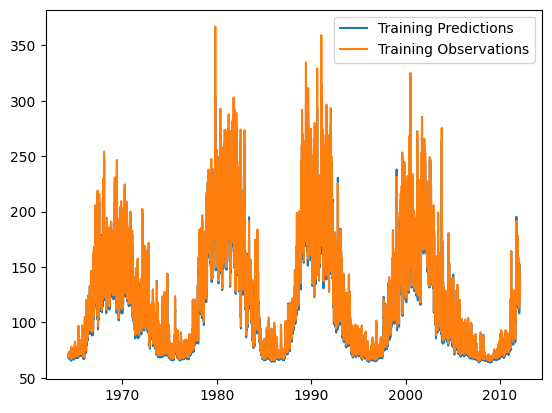

In [39]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [40]:
train_results=pd.DataFrame(data={'Train Predictions':train_predictions,'Actuals':y_train})

In [41]:
train_results

,Train Predictions,Actuals
0,68.259819,69.500000
1,67.837448,71.000000
2,69.140236,71.500000
3,69.766571,73.199997
4,71.290192,72.199997
...,...,...
17425,131.844452,137.199997
17426,131.551300,136.600006
17427,133.174438,139.800003
17428,138.429474,131.500000


69/69 [==============================] - 2s 32ms/step


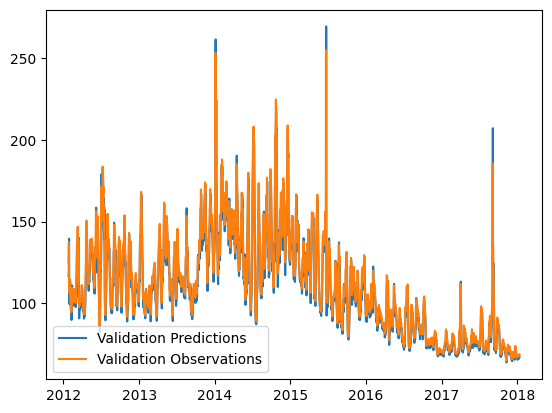

In [42]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

In [43]:
val_results=pd.DataFrame(data={'Validation Predictions':val_predictions,'Actuals':y_val})

In [44]:
val_results

,Validation Predictions,Actuals
0,116.431946,124.300003
1,120.439590,137.399994
2,139.531281,111.000000
3,105.563934,106.599998
4,99.464172,111.000000
...,...,...
2174,66.280243,68.000000
2175,66.571960,68.500000
2176,67.015068,68.099998
2177,66.672073,68.500000


69/69 [==============================] - 2s 31ms/step


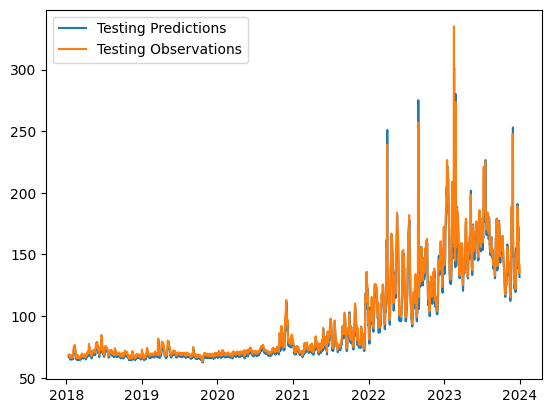

In [45]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [46]:
test_results=pd.DataFrame(data={'Testing Predictions':test_predictions,'Actuals':y_test})
test_results

,Testing Predictions,Actuals
0,67.069183,68.500000
1,67.026657,68.199997
2,66.676262,67.900002
3,66.382240,68.800003
4,67.084976,68.599998
...,...,...
2174,141.032242,144.500000
2175,138.405060,141.800003
2176,137.375320,138.199997
2177,134.644470,135.100006


Text(0, 0.5, 'F10.7 Value')

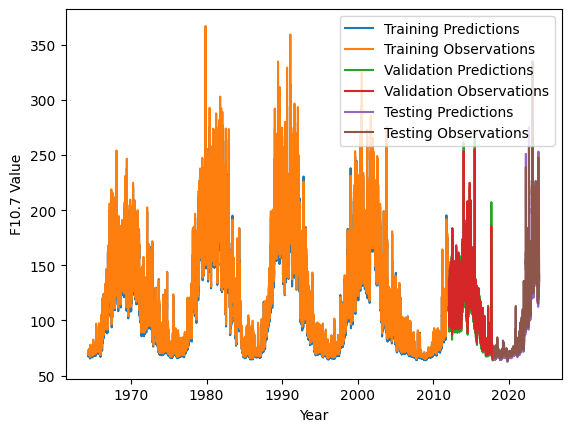

In [47]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])
plt.xlabel('Year')
plt.ylabel('F10.7 Value')


1/1 [==============================] - 0s 38ms/step


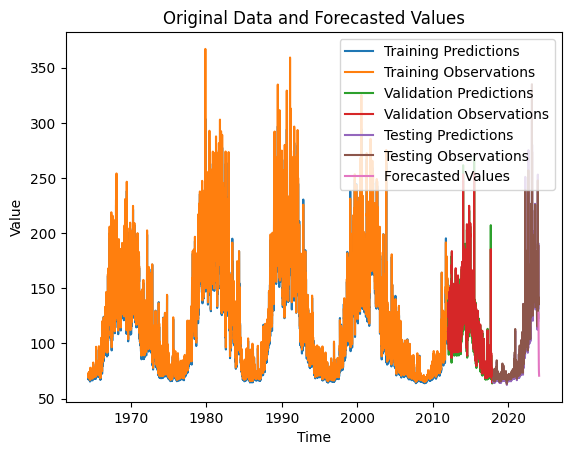

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  


forecast_steps = 30 
forecasted_values = []
last_window = X_train[-1]

for _ in range(forecast_steps):
    next_prediction = model.predict(np.array([last_window]))
    forecasted_values.append(next_prediction)
    last_window = np.concatenate((last_window[1:], next_prediction), axis=0)


forecasted_values = np.array(forecasted_values).flatten()

# Generate x-values for plotting starting from the end of your training data (2024)
# Ensure you have dates_train available
start_index = dates_train[-1].year + 1  # Start from the year after the last training data point


if start_index < 2024:
    start_index = 2024

# End index for forecasted values
end_index = start_index + forecast_steps


forecast_dates = pd.date_range(start=str(start_index), periods=forecast_steps, freq='D')


plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(forecast_dates, forecasted_values, label='Forecasted Values')
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Forecasted Values'])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original Data and Forecasted Values')
plt.show()


In [49]:
forecast_results=pd.DataFrame(data={'WAVE':forecasted_values,'DATE':forecast_dates})
forecast_results

,WAVE,DATE
0,127.886383,2024-01-01
1,123.027023,2024-01-02
2,118.454422,2024-01-03
3,114.480042,2024-01-04
4,111.134674,2024-01-05
5,108.176796,2024-01-06
6,105.441460,2024-01-07
7,102.718369,2024-01-08
8,100.011375,2024-01-09
9,97.192070,2024-01-10


In [50]:
forecast_results

,WAVE,DATE
0,127.886383,2024-01-01
1,123.027023,2024-01-02
2,118.454422,2024-01-03
3,114.480042,2024-01-04
4,111.134674,2024-01-05
5,108.176796,2024-01-06
6,105.441460,2024-01-07
7,102.718369,2024-01-08
8,100.011375,2024-01-09
9,97.192070,2024-01-10


In [51]:
forecast_results.shape

(30, 2)

In [52]:
newdata.shape

(21944, 2)

In [53]:
final = pd.concat([newdata, forecast_results], axis=0)
final.reset_index(drop=True, inplace=True)
final['DATE'] = pd.to_datetime(final['DATE'])
final['DATE'] = final['DATE'].dt.date

In [54]:
final

,WAVE,DATE
0,79.000000,1963-11-28
1,79.000000,1963-11-29
2,79.000000,1963-11-30
3,79.000000,1963-12-01
4,80.000000,1963-12-02
...,...,...
21969,72.456245,2024-01-26
21970,72.201149,2024-01-27
21971,71.533325,2024-01-28
21972,71.273308,2024-01-29


In [55]:
final.index=final.pop('DATE')

In [56]:
final

,WAVE
DATE,
1963-11-28,79.000000
1963-11-29,79.000000
1963-11-30,79.000000
1963-12-01,79.000000
1963-12-02,80.000000
...,...
2024-01-26,72.456245
2024-01-27,72.201149
2024-01-28,71.533325


Text(0, 0.5, 'F10.7 Value')

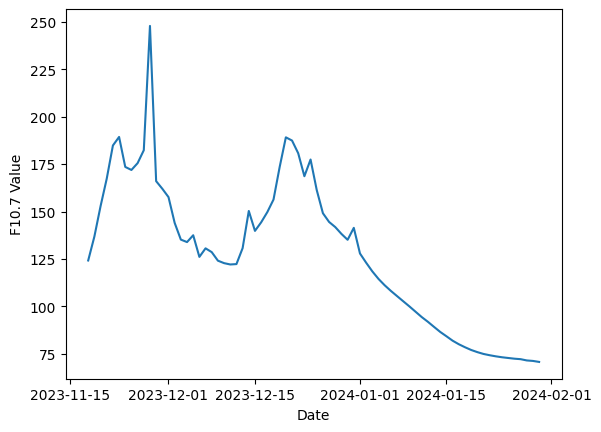

In [57]:
plt.plot(final[21900:])
plt.xlabel('Date')
plt.ylabel('F10.7 Value')